In [1]:
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dendropy
from Bio import SeqIO, Phylo

import load

%matplotlib inline
pd.options.display.precision = 3

In [2]:
records_pseudo = load.records_pseudo
records_staph = load.records_staph

In [3]:
def show_count(rects):
    '''Show the height of each bar in the bar chart'''
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                     xy=(rect.get_x() + rect.get_width()/2, height),
                     ha='center', va='bottom')

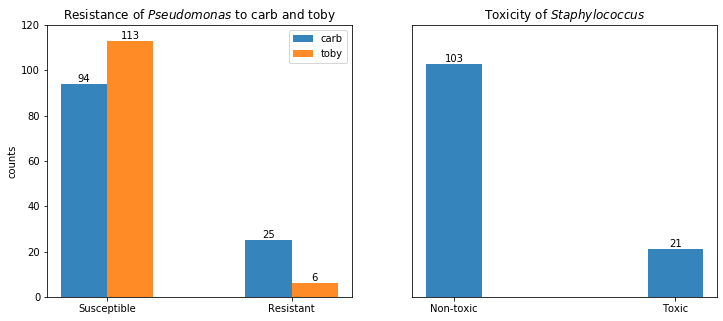

In [4]:
# show the distribution of classes
plt.figure(figsize=(12, 5))
plt.subplot('121')

# pseudo
x = np.array([0, 1]) # False, True
counts_carb = records_pseudo['carb'].value_counts()
carb = plt.bar(x=x-0.125, height=counts_carb, width=0.25, alpha=0.9, label='carb')
counts_toby = records_pseudo['toby'].value_counts()
toby = plt.bar(x=x+0.125, height=counts_toby, width=0.25, alpha=0.9, label='toby')
show_count(carb)
show_count(toby)
plt.xticks(x, ['Susceptible', 'Resistant'])
plt.ylim((0, 120))
plt.ylabel('counts')
plt.title('Resistance of $Pseudomonas$ to carb and toby')
plt.legend()

#staph
plt.subplot('122')
resp_counts = records_staph['resp'].value_counts()
rects = plt.bar(x=x, height=resp_counts, width=0.25, alpha=0.9)
show_count(rects)
plt.xticks(x, ['Non-toxic', 'Toxic'])
plt.ylim((0, 120))
plt.yticks([])
plt.title('Toxicity of $Staphylococcus$')

plt.savefig('skewness.png')
plt.show()

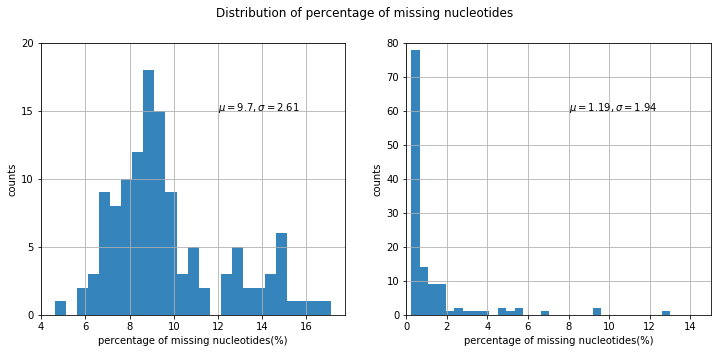

In [5]:
# show the distribution of percentage missingness
plt.figure(figsize=(12, 5))

# pseudo
plt.subplot('121')
data = records_pseudo['missing_percentage']
n, bins, patches = plt.hist(data, bins=25, alpha=0.9)
mu, sigma = np.mean(data), np.std(data)
plt.grid(True)
plt.yticks(ticks=range(0, 21, 5))
plt.ylabel('counts')
plt.xlabel('percentage of missing nucleotides(%)')
plt.text(12, 15, '$\mu={:.3}, \sigma={:.3}$'.format(mu, sigma))

# staph
plt.subplot('122')
data = records_staph['missing_percentage']
n, bins, patches = plt.hist(data, bins=30, alpha=0.9)
mu, sigma = np.mean(data), np.std(data)
plt.grid()
plt.xlim((0, 15))
plt.yticks(ticks=range(0, 90, 10))
plt.ylim((0, 80))
plt.ylabel('counts')
plt.xlabel('percentage of missing nucleotides(%)')
plt.text(8, 60, '$\mu={:.3}, \sigma={:.3}$'.format(mu, sigma))

plt.suptitle('Distribution of percentage of missing nucleotides')
plt.savefig('missingness.png')
plt.show()

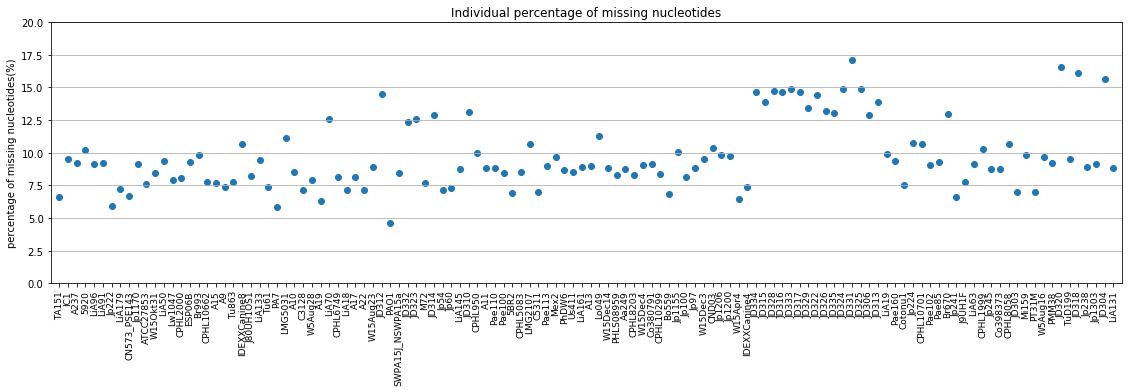

In [6]:
# show the individual missingness of the sequence
plt.figure(figsize=(19.2, 4.8))
plt.scatter(range(122), records_pseudo['missing_percentage'])

plt.xlim((-1, 122))
plt.ylim((0, 20))
plt.xticks(ticks=range(122), labels=records_pseudo['id'].to_list(), rotation=90, fontsize=9)
plt.ylabel('percentage of missing nucleotides(%)')
plt.title('Individual percentage of missing nucleotides')
plt.grid(axis='y')
plt.show()

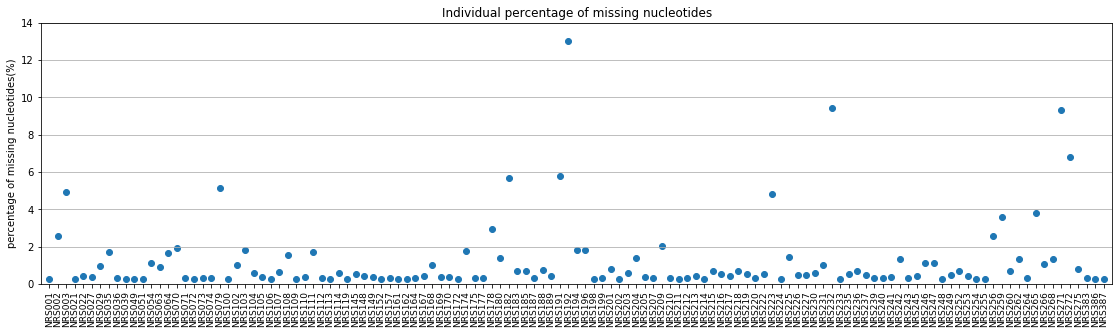

In [7]:
# show the individual missingness of the sequence
plt.figure(figsize=(19.2, 4.8))
plt.scatter(range(125), records_staph['missing_percentage'])

plt.xlim((-1, 125))
plt.ylim((0, 14))
plt.xticks(ticks=range(125), labels=records_staph['ids'].to_list(), rotation=90, fontsize=9)
plt.ylabel('percentage of missing nucleotides(%)')
plt.title('Individual percentage of missing nucleotides')
plt.grid(axis='y')
plt.show()

In [16]:
# ratio of different nucleotides in total
c_pseudo = Counter()
for seq in records_pseudo['sequence']:
    c_pseudo.update(Counter(seq))
    
c_staph = Counter()
for seq in records_staph['sequence']:
    c_staph.update(Counter(seq))

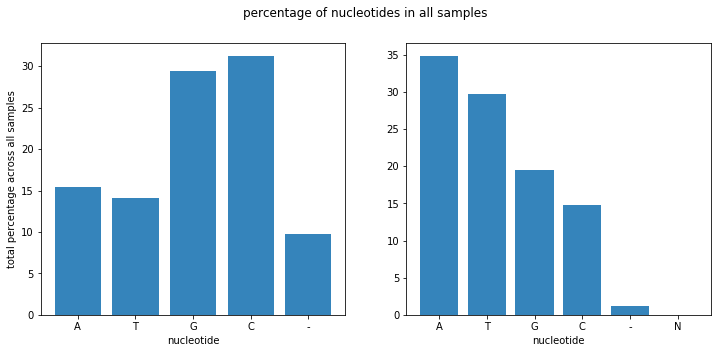

In [10]:
plt.figure(figsize=(12, 5))
plt.subplot('121')

total = pd.Series(c_pseudo)
total /= (total.sum() / 100)
plt.bar(x=total.index, height=total, alpha=0.9)
plt.xlabel('nucleotide')
plt.ylabel('total percentage across all samples')

plt.subplot('122')

total = pd.Series(c_staph)
total /= (total.sum() / 100)
plt.bar(x=total.index, height=total, alpha=0.9)
plt.xlabel('nucleotide')

plt.suptitle('percentage of nucleotides in all samples')
plt.show()

In [6]:
%time sequence_pseudo = pd.DataFrame.from_dict(records_pseudo['sequence'].apply(list).to_dict()).transpose()

CPU times: user 31.3 s, sys: 1.75 s, total: 33.1 s
Wall time: 26.8 s


In [12]:
variations_pseudo = []
for locus, content in sequence_pseudo.items():
    variations_pseudo.append(len(Counter(content)))

In [18]:
%time sequence_staph = pd.DataFrame.from_dict(records_staph['sequence'].apply(list).to_dict()).transpose()

CPU times: user 1min, sys: 4.72 s, total: 1min 5s
Wall time: 58.5 s


In [14]:
variations_staph = []
for locus, content in sequence_staph.items():
    variations_staph.append(len(Counter(content)))

In [15]:
np.save('../data/pseudo/pseudo_gene_variations.npy', np.array(variations_pseudo))
np.save('../data/staph/staph_gene_variations.npy', np.array(variations_staph))

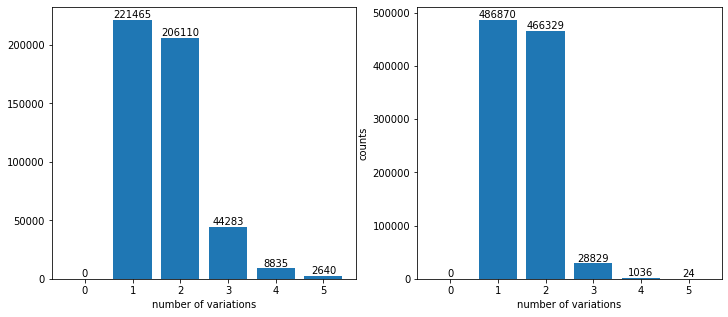

In [16]:
plt.figure(figsize=(12, 5))

plt.subplot('121')
counts = np.bincount(variations_pseudo)
rects = plt.bar(range(len(counts)), counts)
show_count(rects)
plt.xlabel('number of variations')

plt.subplot('122')
counts = np.bincount(variations_staph)
rects = plt.bar(range(len(counts)), counts)
show_count(rects)
plt.xlabel('number of variations')
plt.ylabel('counts')
plt.show()

In [23]:
%time missing_pseudo = sequence_pseudo != '-'

CPU times: user 1min 41s, sys: 1.5 s, total: 1min 43s
Wall time: 1min 35s


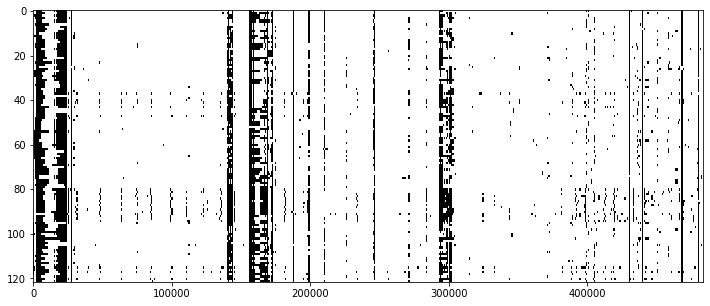

In [22]:
plt.figure(figsize=(12, 5))
plt.imshow(missing_pseudo, aspect='auto', cmap='gray')
plt.show()

In [19]:
%time missing_staph = sequence_staph != '-'

CPU times: user 3min 20s, sys: 3.77 s, total: 3min 23s
Wall time: 3min 15s


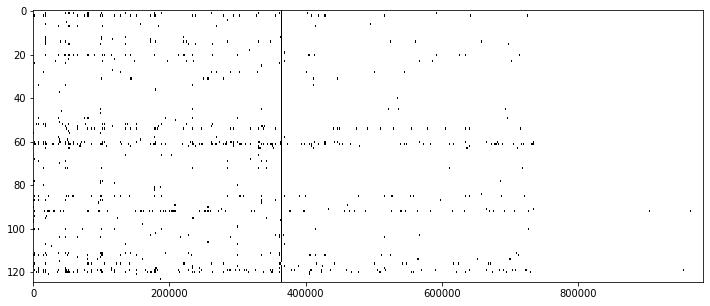

In [21]:
plt.figure(figsize=(12, 5))
plt.imshow(missing_staph, aspect='auto', cmap='gray')
plt.show()